# Comparison of random number generators

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

N_SAMPLES = 2550000
BINS = 1000

### 1. Linear Congruential Generator

In [2]:
linear_congruential = pd.read_csv("data/uniform/linear_congruential.csv", nrows=N_SAMPLES)
linear_congruential.describe()

,Linear Congruential Numbers
count,2.550000e+06
mean,5.002193e-01
std,2.886510e-01
min,4.540198e-07
25%,2.501296e-01
50%,5.005746e-01
75%,7.503783e-01
max,9.999998e-01


In [ ]:
U1 = linear_congruential.iloc[:N_SAMPLES//2, 0].values
U2 = linear_congruential.iloc[N_SAMPLES//2:N_SAMPLES, 0].values

R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

linear_congruential_normal = pd.DataFrame(np.concatenate([X, Y]), columns=['Linear Congruential Numbers'])
linear_congruential_normal.to_csv("data/normal/linear_congruential.csv", index=False)
linear_congruential_normal.describe()

,Linear Congruential Numbers
count,2.550000e+06
mean,-3.821446e-04
std,9.999449e-01
min,-4.992973e+00
25%,-6.739709e-01
50%,-4.614406e-04
75%,6.736570e-01
max,4.877928e+00


### 2. Mersenne-Twister

In [4]:
mersenne_twister = pd.read_csv("data/uniform/mersenne_twister.csv", nrows=N_SAMPLES)
mersenne_twister.describe()

,Mersenne-Twister Numbers
count,2.550000e+06
mean,4.998853e-01
std,2.886658e-01
min,4.548247e-09
25%,2.499301e-01
50%,4.998829e-01
75%,7.498619e-01
max,9.999995e-01


In [ ]:
U1 = mersenne_twister.iloc[:N_SAMPLES//2, 0].values
U2 = mersenne_twister.iloc[N_SAMPLES//2:N_SAMPLES, 0].values

R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

mersenne_twister_normal = pd.DataFrame(np.concatenate([X, Y]), columns=['Mersenne-Twister Numbers'])
mersenne_twister_normal.to_csv("data/normal/mersenne_twister.csv", index=False)
mersenne_twister_normal.describe()

,Mersenne-Twister Numbers
count,2.550000e+06
mean,-4.011301e-04
std,1.000466e+00
min,-5.182504e+00
25%,-6.758024e-01
50%,-5.348086e-04
75%,6.746515e-01
max,5.361210e+00


### 3. True random numbers

In [6]:
true_random = pd.read_csv("data/uniform/true_random.csv", nrows=N_SAMPLES)
true_random.describe()

,True Random Numbers
count,2.550000e+06
mean,5.002617e-01
std,2.886880e-01
min,5.003546e-07
25%,2.504635e-01
50%,5.003105e-01
75%,7.503320e-01
max,1.000000e+00


In [ ]:
U1 = true_random.iloc[:N_SAMPLES//2, 0].values
U2 = true_random.iloc[N_SAMPLES//2:N_SAMPLES, 0].values

R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

true_random_normal = pd.DataFrame(np.concatenate([X, Y]), columns=['True Random Numbers'])
true_random_normal.to_csv("data/normal/true_random.csv", index=False)
true_random_normal.describe()

,True Random Numbers
count,2.550000e+06
mean,2.555468e-05
std,9.990597e-01
min,-5.048215e+00
25%,-6.735623e-01
50%,8.976171e-05
75%,6.733815e-01
max,4.678564e+00


### Histograms

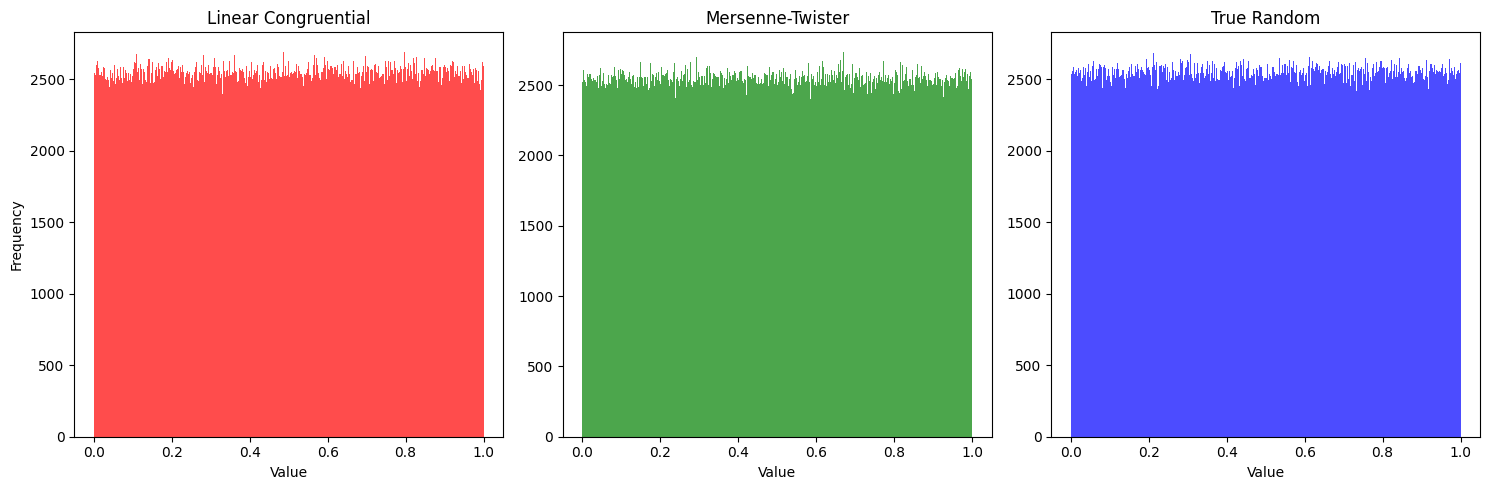

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential, bins=BINS, color="red", alpha=0.7)
plt.title("Linear Congruential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister, bins=BINS, color="green", alpha=0.7)
plt.title("Mersenne-Twister")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(true_random, bins=BINS, color="blue", alpha=0.7)
plt.title("True Random")
plt.xlabel("Value")

plt.tight_layout()
plt.savefig("imgs/histogram.png")

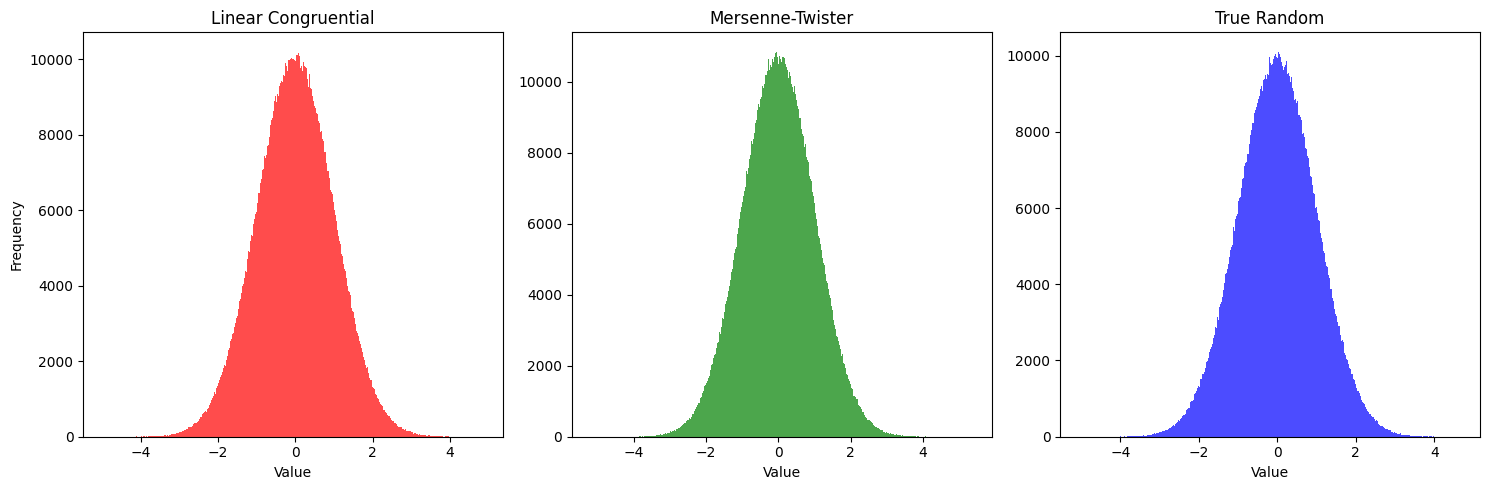

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential_normal, bins=BINS, color="red", alpha=0.7)
plt.title("Linear Congruential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister_normal, bins=BINS, color="green", alpha=0.7)
plt.title("Mersenne-Twister")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(true_random_normal, bins=BINS, color="blue", alpha=0.7)
plt.title("True Random")
plt.xlabel("Value")

plt.tight_layout()
plt.savefig("imgs/histogram_normal.png")

### Student's t-Test

In [10]:
ttest = stats.ttest_ind(true_random, linear_congruential)
print(f"True Random vs Linear Congruential: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

ttest = stats.ttest_ind(true_random, mersenne_twister)
print(f"True Random vs Mersenne-Twister: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

ttest = stats.ttest_ind(linear_congruential, mersenne_twister)
print(f"Linear Congruential vs Mersenne-Twister: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

True Random vs Linear Congruential: t = 0.166, p = 0.868
True Random vs Mersenne-Twister: t = 1.472, p = 0.141
Linear Congruential vs Mersenne-Twister: t = 1.307, p = 0.191


### Chi-squared test

In [11]:
def chi2_uniform_test(data, bins=BINS):
    observed = np.histogram(data, bins=bins)[0]
    expected = np.full(bins, len(data)/bins)
    return stats.chisquare(observed, expected)

chi2_c = chi2_uniform_test(linear_congruential)
print(f"Linear Congruential: chi2 = {chi2_c.statistic:.3f}, p = {chi2_c.pvalue:.3f}")

chi2_mt = chi2_uniform_test(mersenne_twister)
print(f"Mersenne-Twister: chi2 = {chi2_mt.statistic:.3f}, p = {chi2_mt.pvalue:.3f}")

chi2_tr = chi2_uniform_test(true_random)
print(f"True Random: chi2 = {chi2_tr.statistic:.3f}, p = {chi2_tr.pvalue:.3f}")

Linear Congruential: chi2 = 962.200, p = 0.794
Mersenne-Twister: chi2 = 958.196, p = 0.819
True Random: chi2 = 931.143, p = 0.938


### Cauchy Distribution

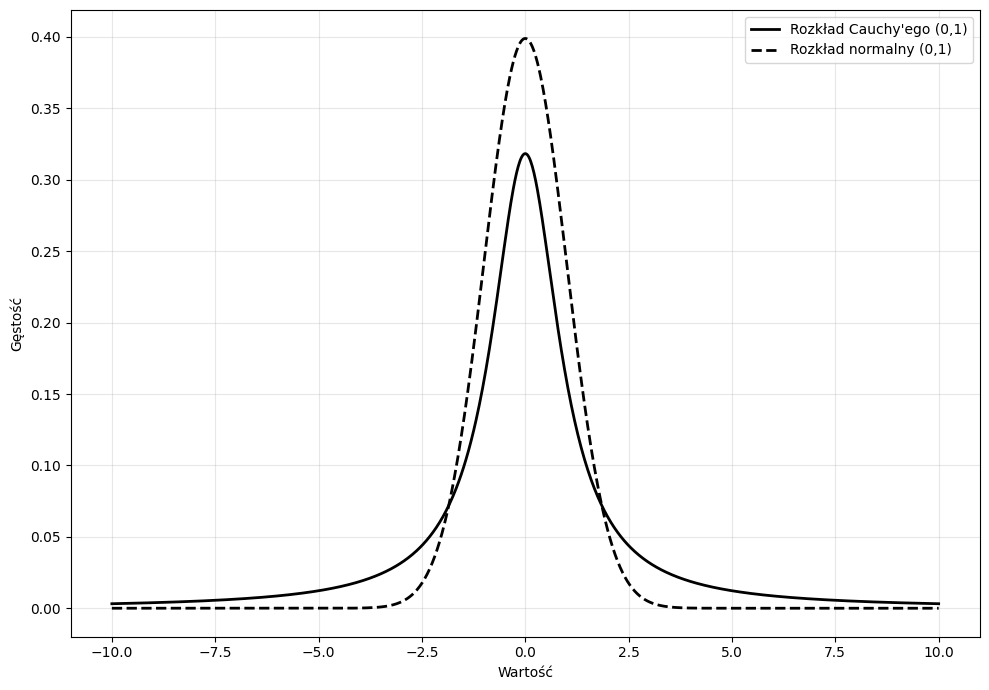

In [12]:
plt.figure(figsize=(10, 7))
x = np.linspace(-10, 10, 1000)

theoretical_cauchy = stats.cauchy.pdf(x, loc=0, scale=1)
plt.plot(x, theoretical_cauchy, 'k-', linewidth=2, label='Rozkład Cauchy\'ego (0,1)')

theoretical_gauss = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, theoretical_gauss, 'k--', linewidth=2, label='Rozkład normalny (0,1)')

plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig("imgs/cauchy_distribution.png")
plt.show()